# Lightkurve Workshop

## Getting Started

If you would like to get started with this tutorial, we recommend you have the following installed:
* lightkurve version 1.0b26 (use pip install lightkurve --upgrade)

Once you have looked through this workshop, we also have a full set of tutorials on all of the functionality of lightkurve available here:
* http://docs.lightkurve.org/tutorials/

## Introduction

Lightkurve is a package to help users access and process data from NASA's Kepler, K2 and TESS missions. You can use lightkurve to quickly get to work using these data sets for your own science goals.

In [2]:
import lightkurve as lk

### Data types

* Target Pixel Files (TPFs): Image files containing small "cut outs" around targets. These imagettes generally contain ~20 - 200 pixels, and so they can become quite large. TPFs are the most raw form of data you will work with.

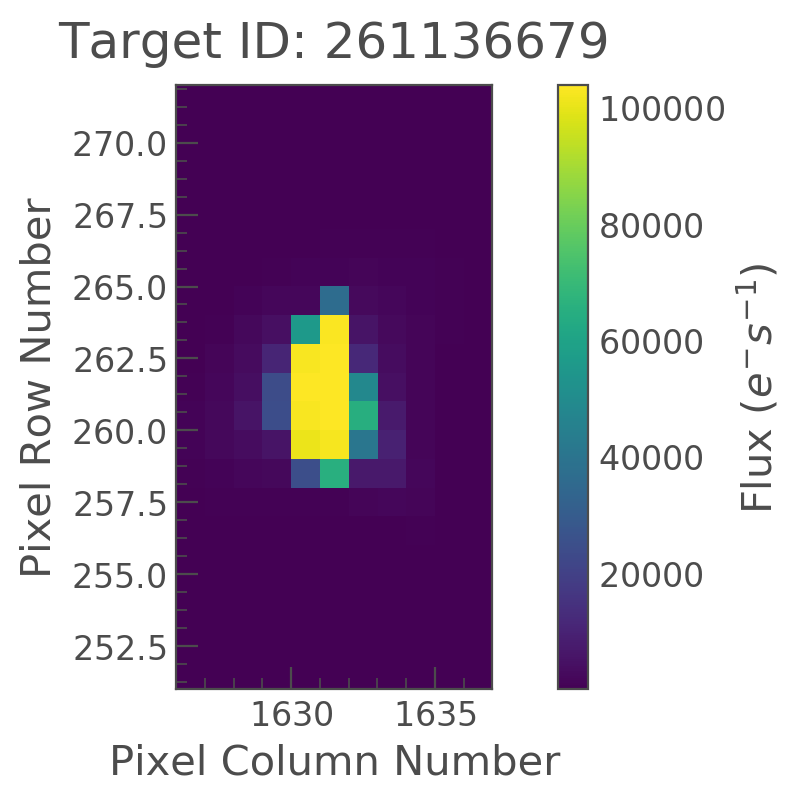

In [3]:
tpf = lk.search_targetpixelfile('Pi Mensae', sector=1).download()
tpf.plot();

* Light Curve Files (LCFs): These files are created by the Kepler pipeline. The pipeline converts TPFs in to light curves, and stores them as a fits file. For TESS, Kepler and K2 there are two light curves in each light curve file; a Simple Aperture Photometry (SAP) light curve and a Pre Datasearch Conditioned (PDCSAP) light curve. The PDCSAP light curves have been processed to remove some instrumental artefacts.

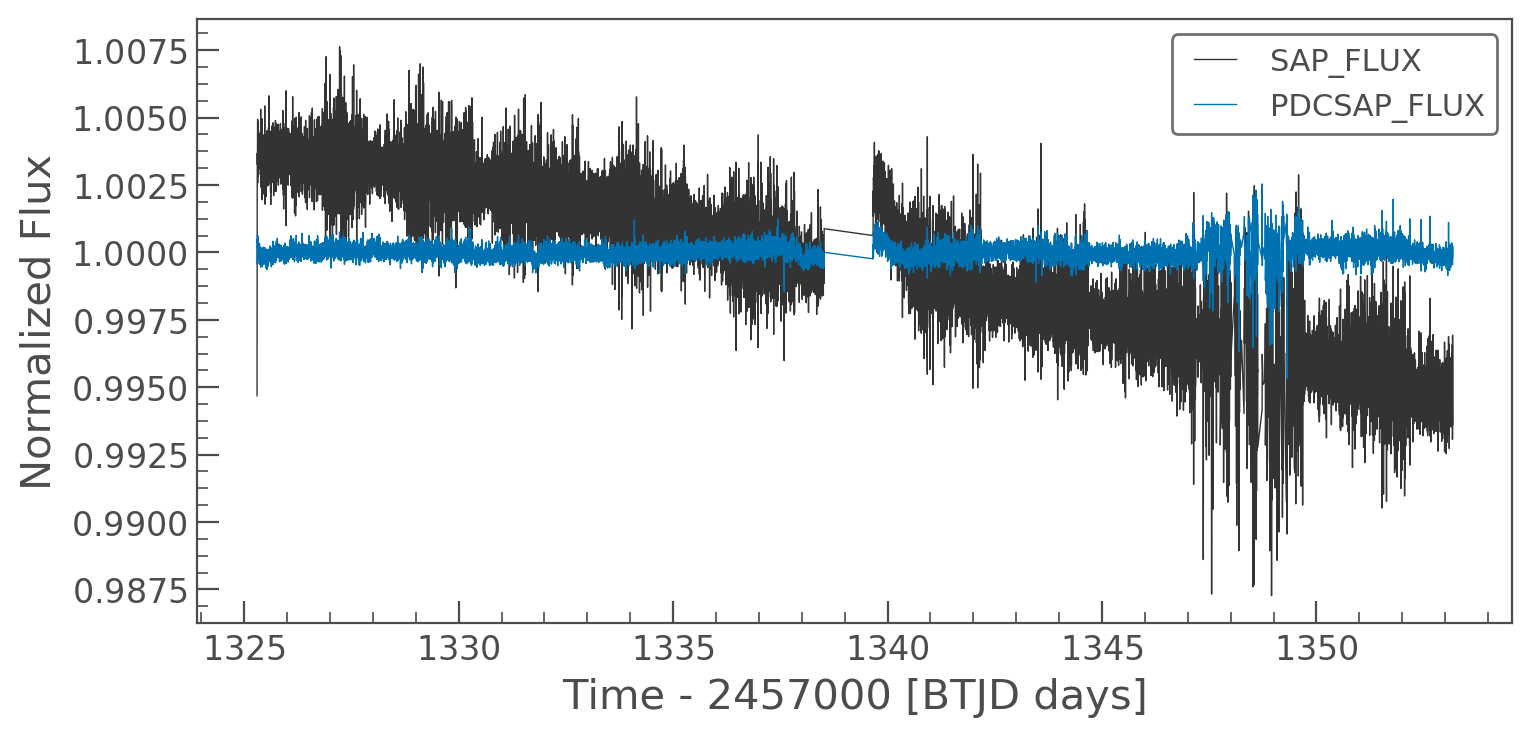

In [4]:
lcf = lk.search_lightcurvefile('Pi Mensae', sector=1).download()
lcf.plot();

* Light Curves: Light curves are simply target flux as a function of time. Each light curve file (LCF) has two light curves in it. Light curves can also be built out of any time/flux data you have access to.

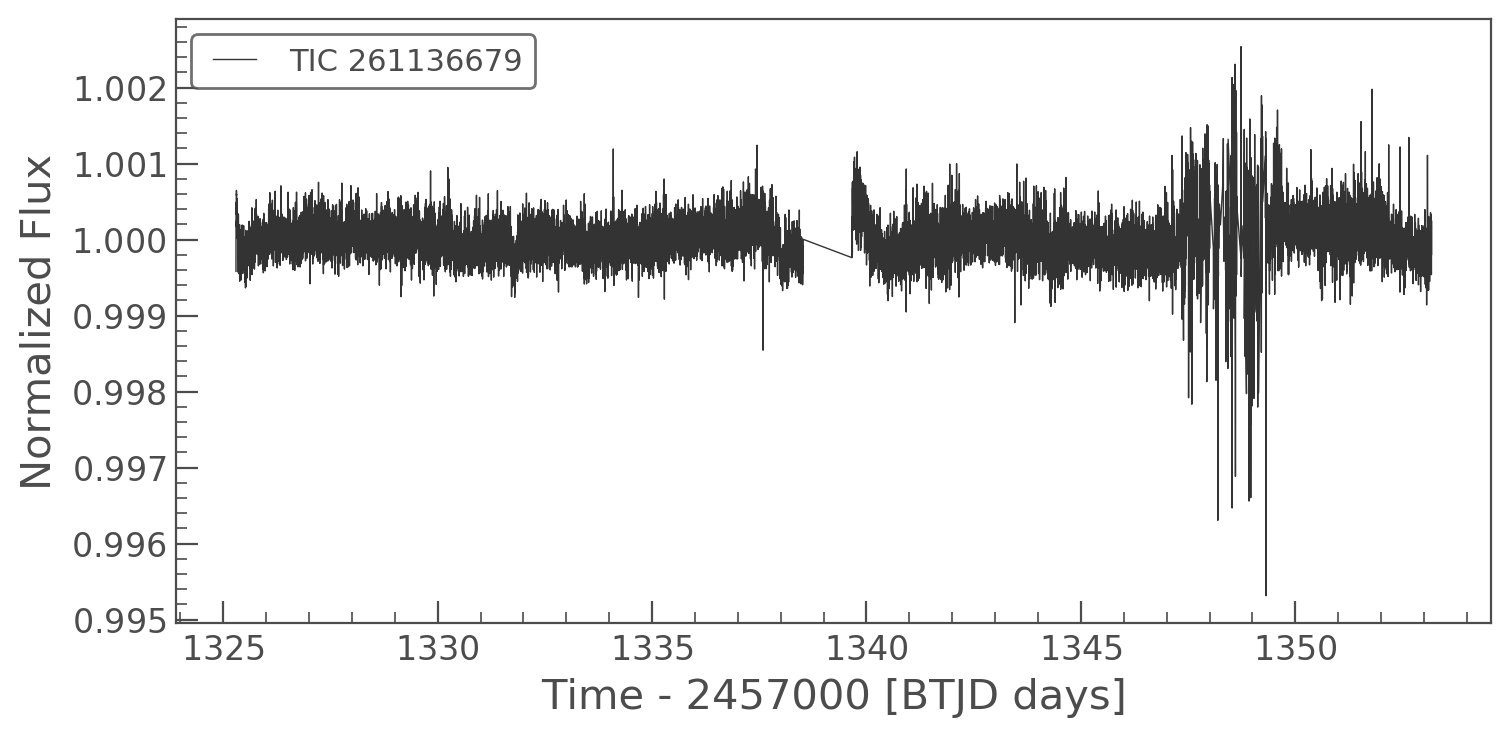

In [5]:
lc = lcf.PDCSAP_FLUX
lc.plot();

The primary workflow for TESS and Kepler is to go from either TPFs or LCFs to light curves, clean and process the data, and then search for signals from e.g. transiting planets.

### Working with TPFs (User Generated Light Curves)

The most interesting data in a `KeplerTargetPixelFile` object are the `flux` and `time` values which give access to the brightness of the observed target over time. You can access the timestamps of the observations using the `time` property:

In [6]:
tpf.time

array([1325.29698328, 1325.29837215, 1325.29976102, ..., 1353.17431099,
       1353.17569985, 1353.17708871])

By default, `time` is in the Kepler-specific *Barycentric Kepler Julian Day* format (BKJD). You can easily convert this into [AstroPy Time objects](http://docs.astropy.org/en/stable/time/) using the `astropy_time` property:

In [7]:
tpf.astropy_time

<Time object: scale='tdb' format='jd' value=[2458325.29698328 2458325.29837215 2458325.29976102 ... 2458353.17431099
 2458353.17569985 2458353.17708871]>

Next, let's look at the actual image data, which is available via the `flux` property:

In [9]:
tpf.flux.shape

(18104, 21, 11)

The `flux` data is a 18104 x 21 x 11 array in units electrons/second. The first axis is the time axis, and the images themselves are 21 pixels by 11 pixels. You can use the `plot` method on the `KeplerTargetPixelFile` object to view the data.

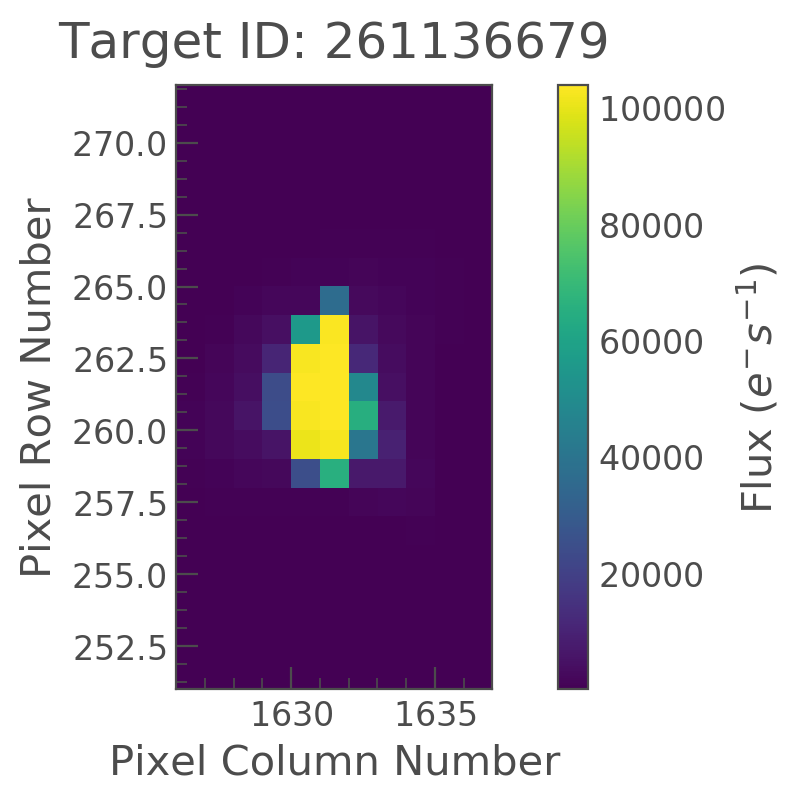

In [11]:
tpf.plot();

You also have acces to the pipeline generated pixel mask. This mask can be used to generate a light curve, or you can create your own.

In [14]:
tpf.pipeline_mask

array([[False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False,  True,  True,  True,  True, False,
        False, False],
       [False, False, False,  True,  True,  True,  True,  True, False,
        False, False],
       [False, False,  True,  True,  True,  True,  True,  True, False,
        False, False],
       [False, False,  True,  True,  True,  True,  True, Fal

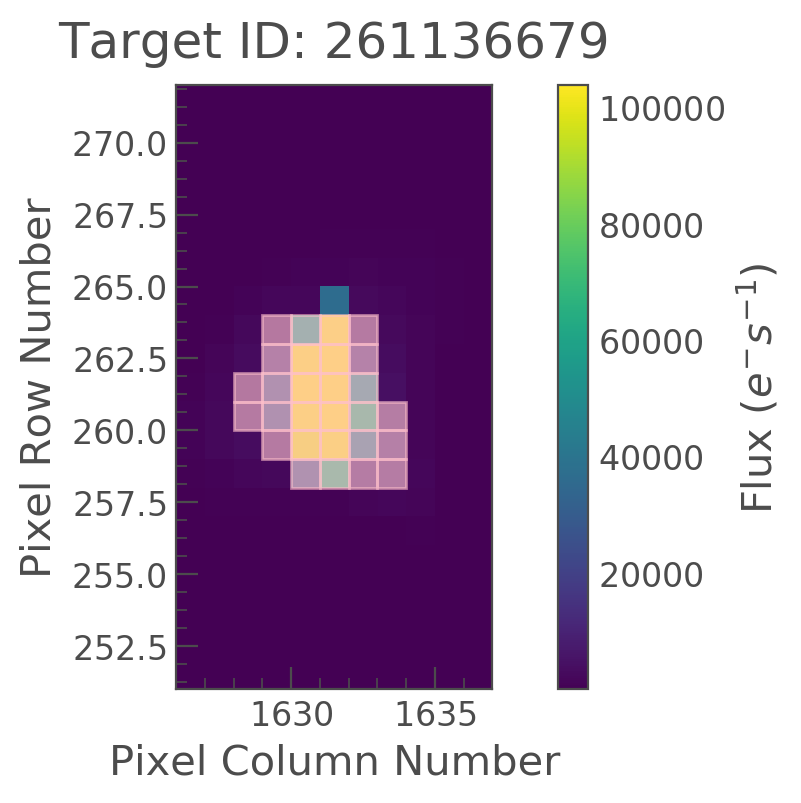

In [15]:
tpf.plot(aperture_mask=tpf.pipeline_mask)

The `create_threshold_mask` method will allow you to build your own aperture. You can choose a `sigma` level above the background, and light curve will automatically select a target above that threshold.

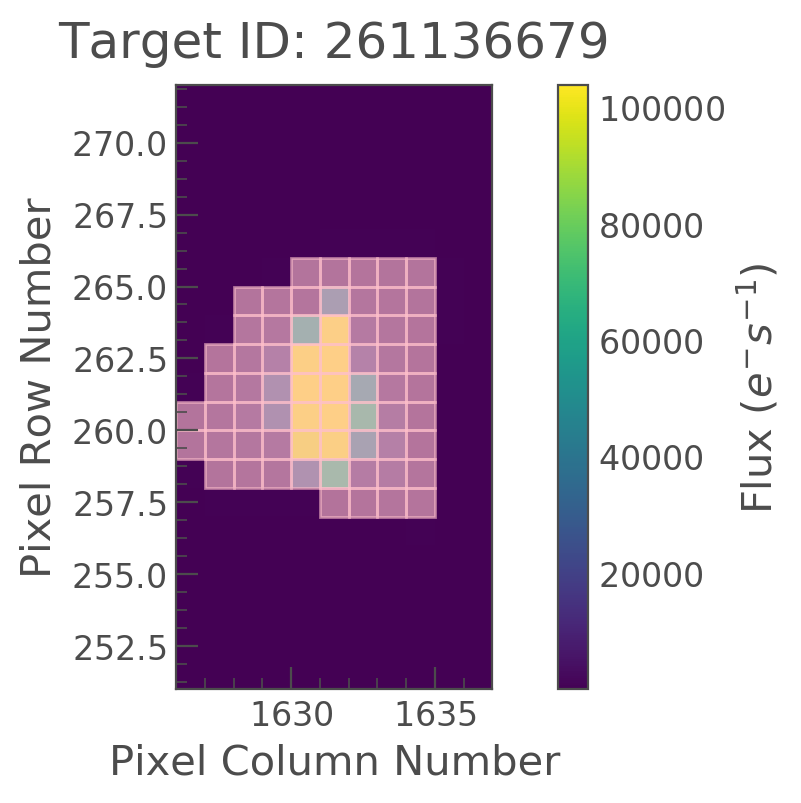

In [18]:
aper = tpf.create_threshold_mask(threshold=3)
tpf.plot(aperture_mask=aper)

Now that we have an aperture, we can sum up the flux inside the aperture and create a light curve.

In [19]:
lc = tpf.to_lightcurve(aperture_mask=aper)

In [21]:
lc

TessLightCurve(TICID: 261136679)

`lc` is now a `TessLightCurve`, which has new properties and methods. For example, light curves also have a `plot` method:


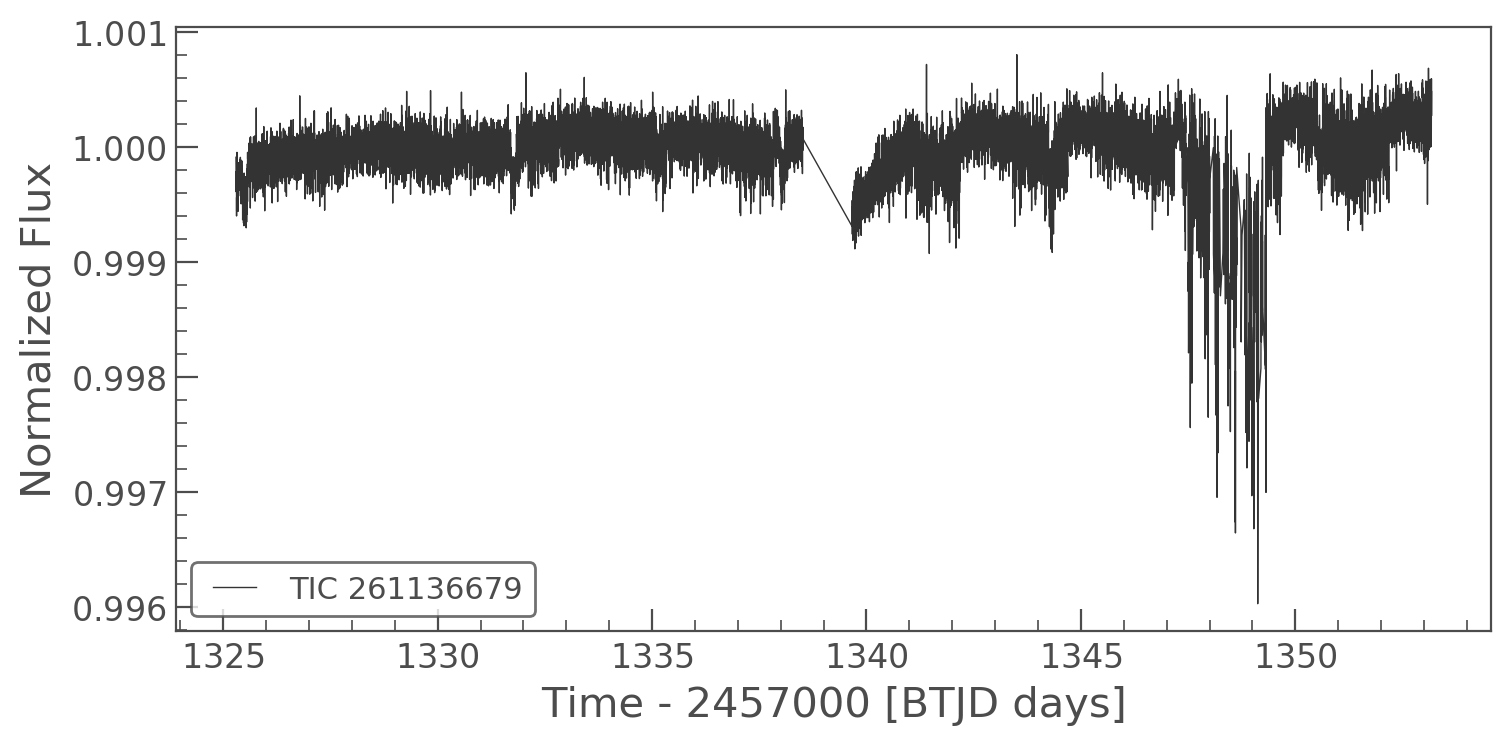

In [22]:
lc.plot()

You can interact with this object using familiar `matplotlib.pyplot` keywords and syntax. There are also `scatter` and `errorbar` plotting methods.

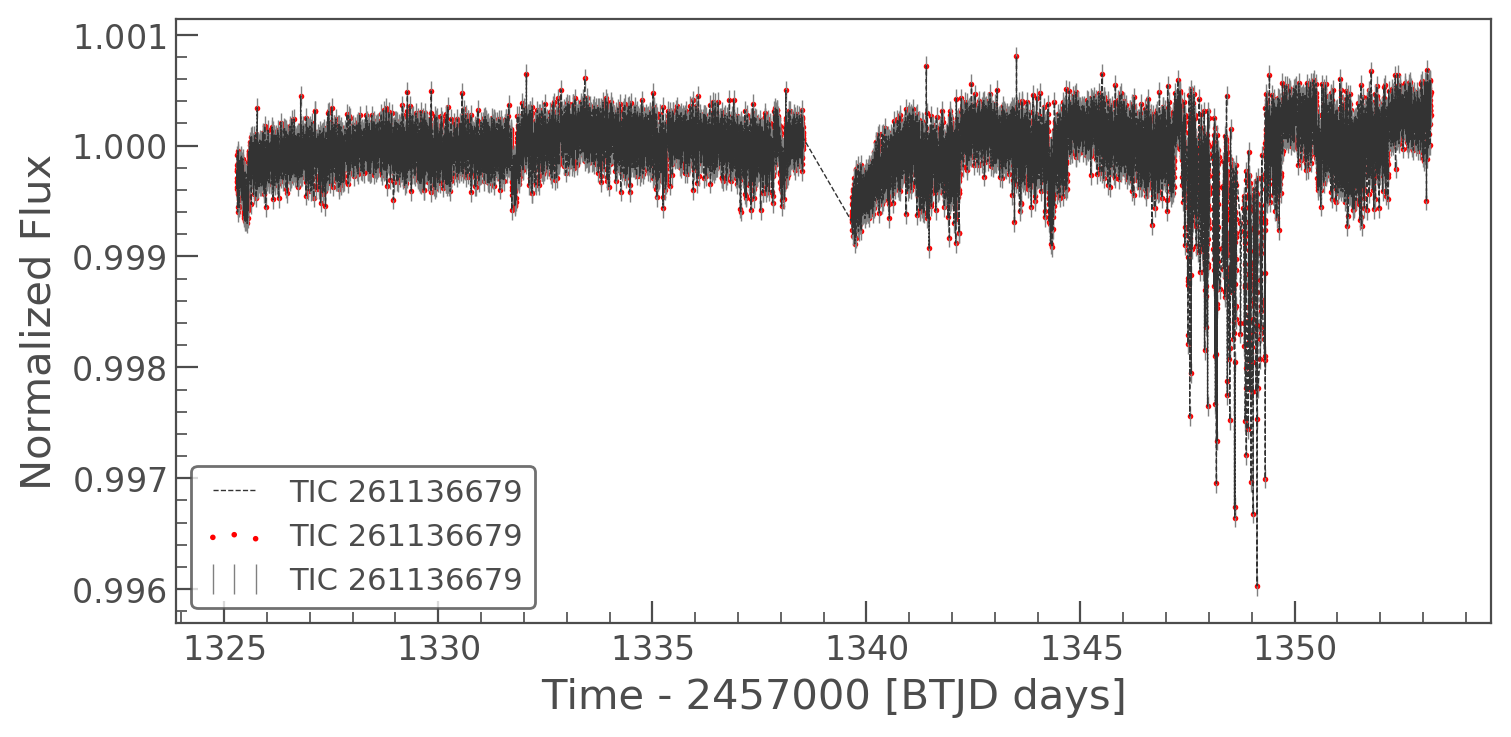

In [31]:
ax = lc.plot(ls='--')
lc.errorbar(ax=ax, c='grey')
lc.scatter(ax=ax, c='r')

You can also use the `interact` method to interactively view the pixel data

![InteractGif](interact_gif.gif "interact")

**Remember:** You can access the pipeline corrected light curves using light curve files from MAST. These have been corrected for instrument systematics.

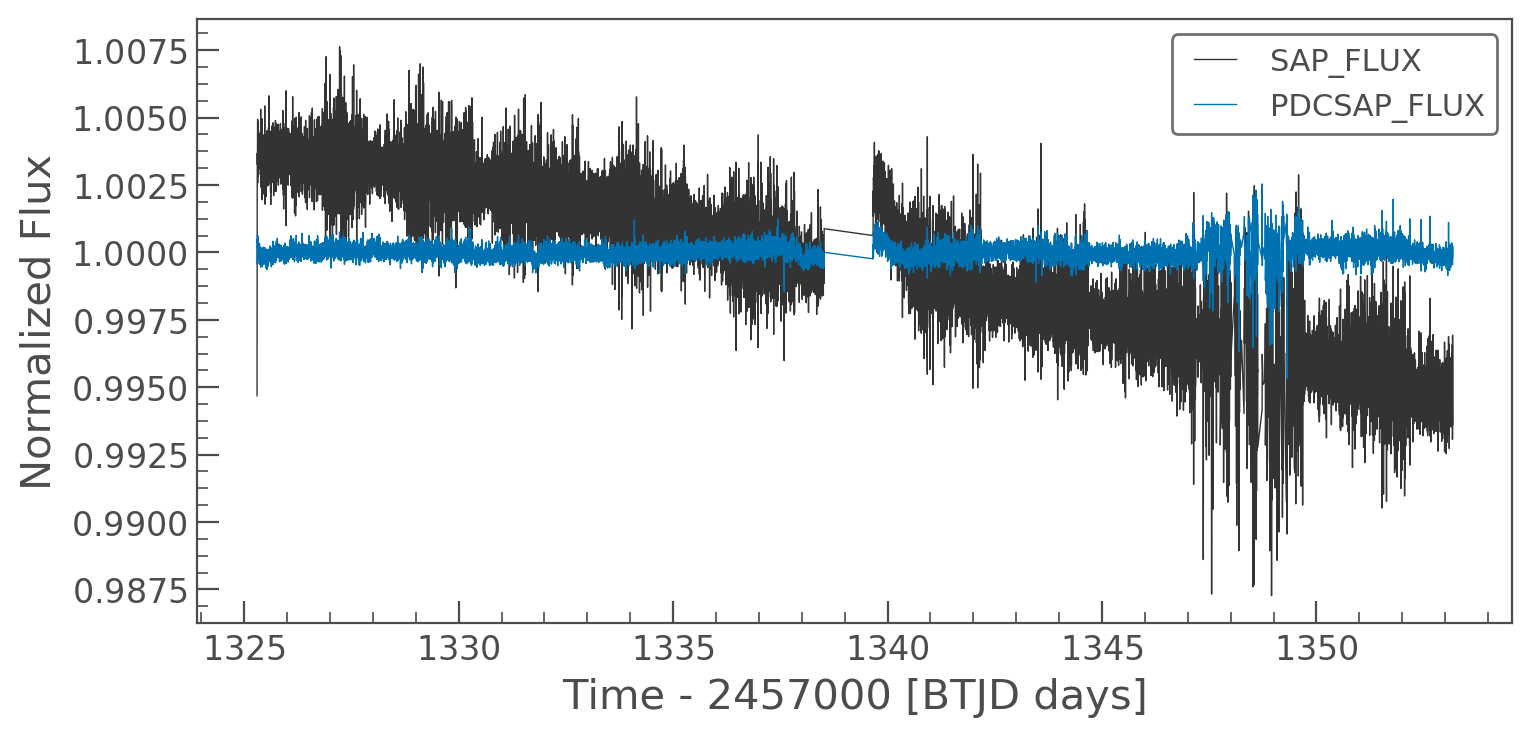

In [38]:
lcf.plot()

In [40]:
lcf.PDCSAP_FLUX

TessLightCurve(TICID: 261136679)

### Making simple corrections to light curves

Light curves can be corrected with the following methods:

 * `lc.remove_nans()`
 * `lc.remove_outliers()`
 * `lc.normalize()`
 * `lc.flatten()`
 * `lc.bin()`

**Remember:** You can read more about each method in the docs, or in our docstrings.

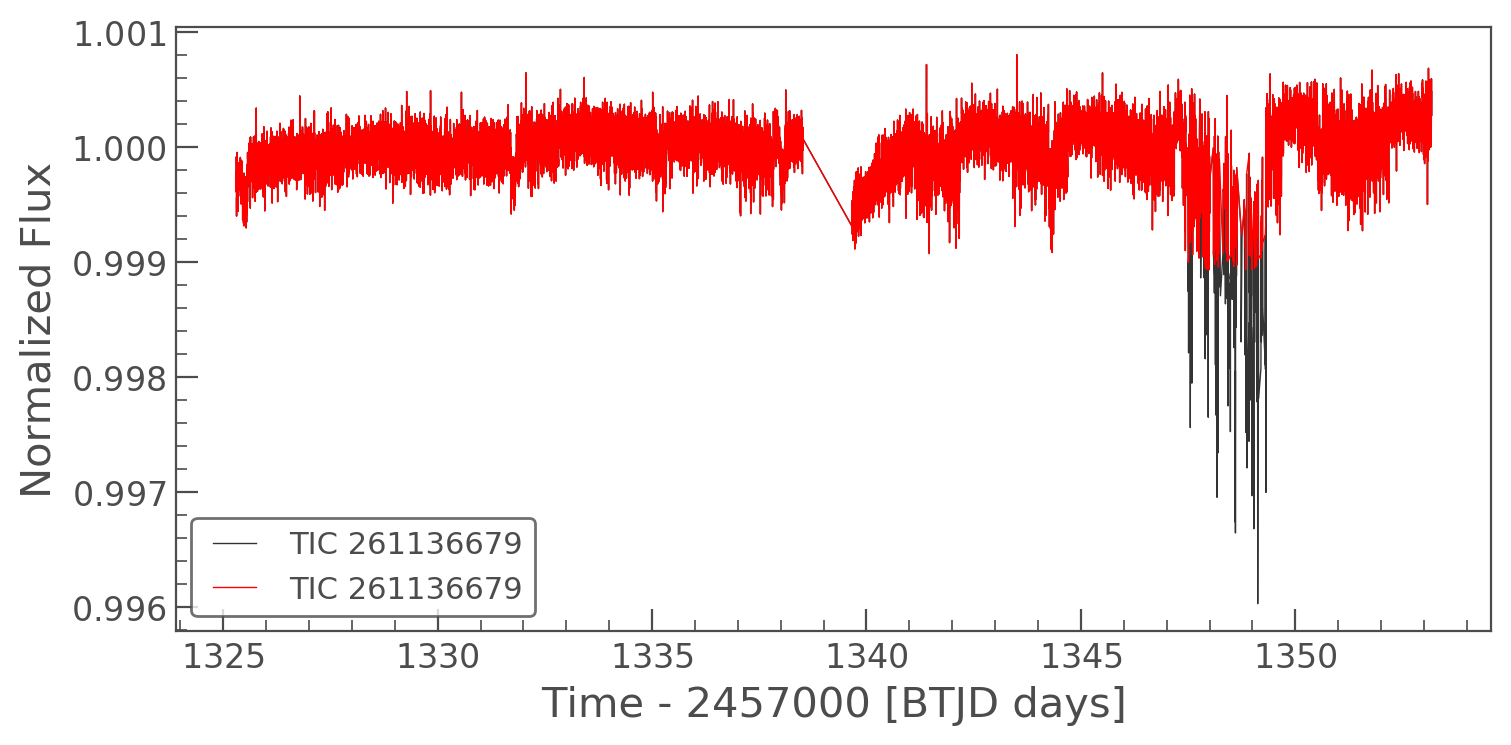

In [50]:
ax = lc.plot()
lc.remove_outliers(sigma=5).plot(ax=ax, c='red');

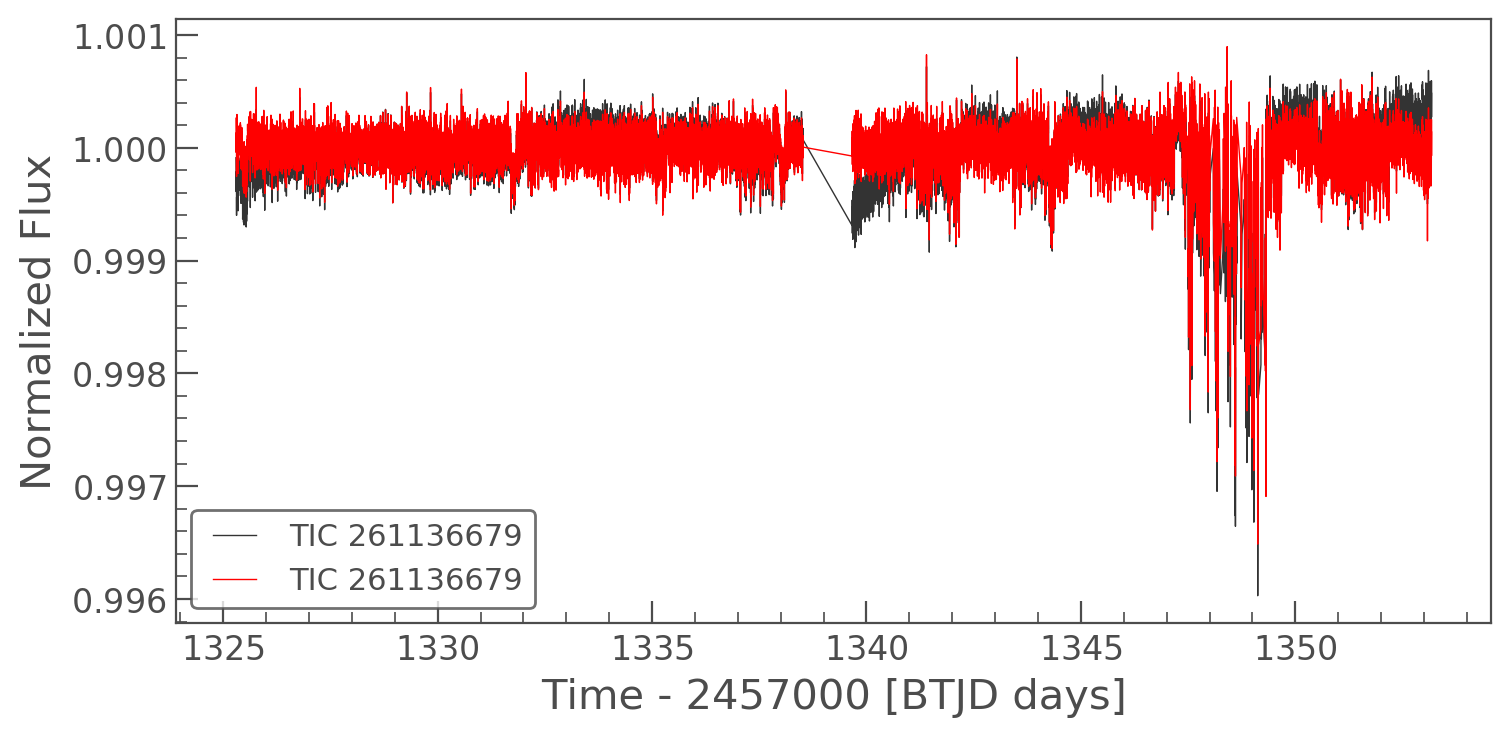

In [52]:
ax = lc.plot()
lc.flatten(window_length=1501, break_tolerance=50).plot(ax=ax, c='red');

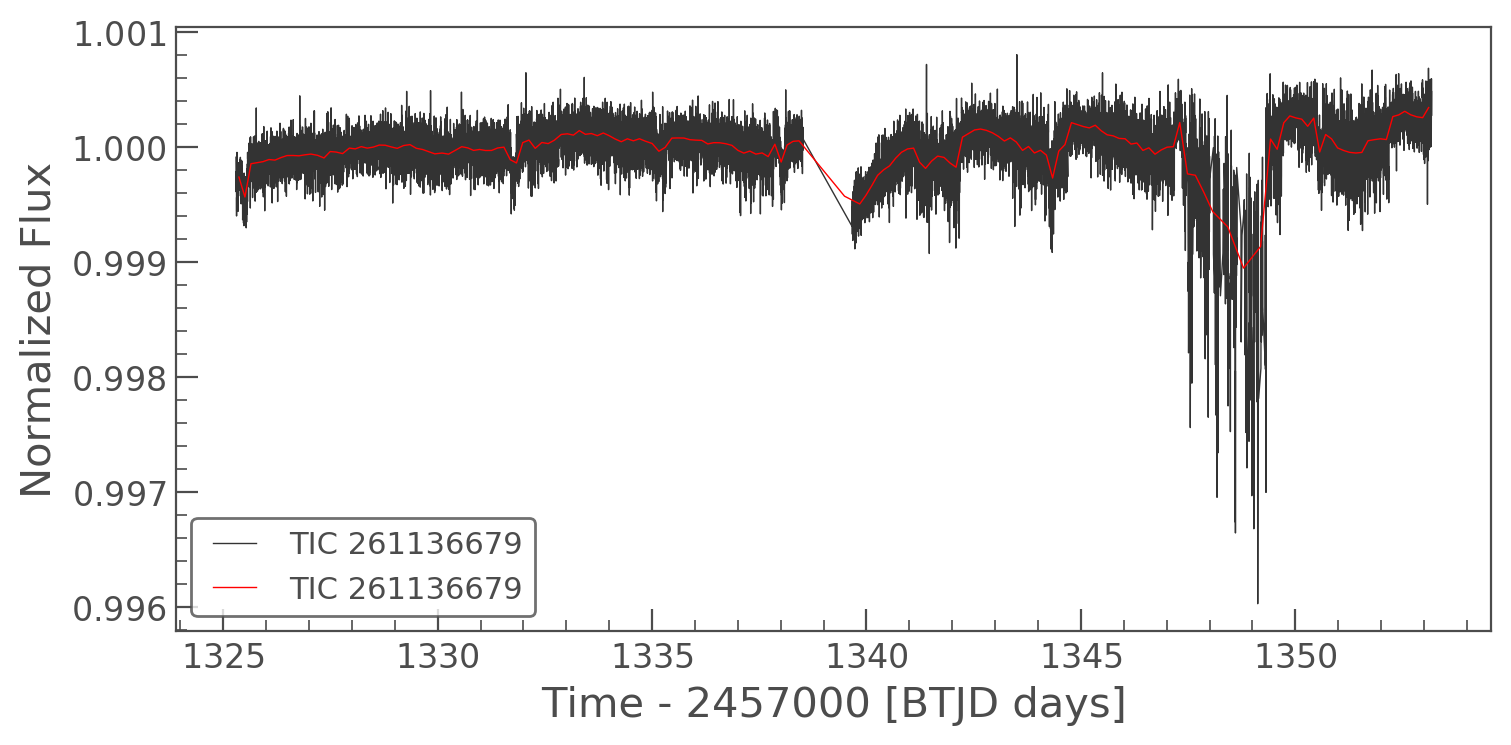

In [53]:
ax = lc.plot()
lc.bin(binsize=100).plot(ax=ax, c='red');

### Folding Light Curves

### Converting light curves to other formats

* `lc.to_pandas()`
* `lc.to_fits(PATH)`
* `lc.to_csv(PATH)`

In [37]:
lc.to_pandas().head(5)

,time,flux,flux_err
time,,,
1325.296983,1325.296983,1462332.500,128.597092
1325.298372,1325.298372,1462201.000,128.587204
1325.299761,1325.299761,1462039.375,128.584320
1325.301150,1325.301150,1461990.750,128.578857
1325.302539,1325.302539,1461893.625,128.573776
